In [30]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split


- Binary Classification (cat or dog) #One label of each
- Multi-class Classification (label of foods) #One label of each but multiple available labels
- Multi-label Classification (tags for articles) #Multiple labels for each
 
Outputs for data labels is the probablity of each label being true.
 
[0.1, 0.3, 0.6] #This means that the first label is 10% true, the second is 30% true, and the third is 60% true.

## Data

In [31]:
from sklearn.datasets import make_circles

#Make 1000 data points
n = 1000
X, y = make_circles(n_samples=n, shuffle=True, noise=0.1, random_state=None, factor=0.2)

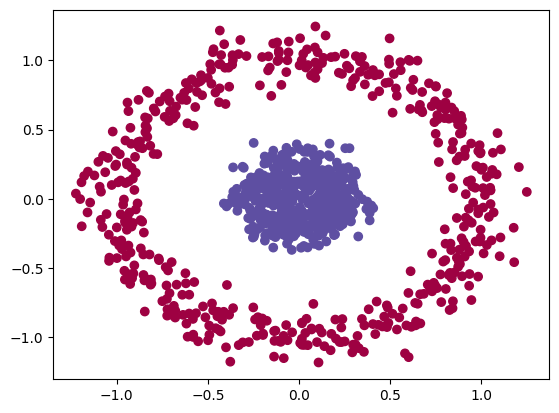

In [32]:
#Plot x and y with y determined by color
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)
plt.show()


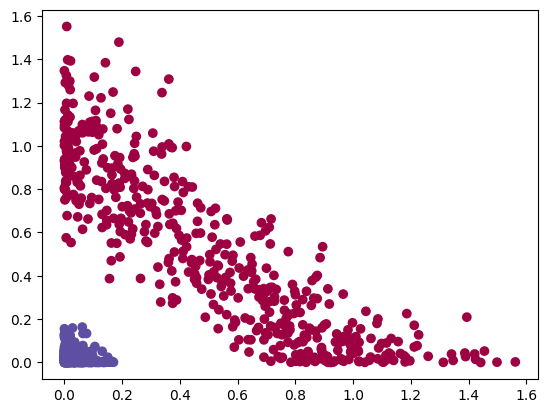

In [33]:
#Square the data for linear separability
X_squared = np.square(X)

plt.scatter(X_squared[:,0], X_squared[:,1], c=y, cmap=plt.cm.Spectral)


### Input and output shapes

In [34]:
input = X.shape[1]
#if unique values are 2 (binary), then subtract 1, else don't subtract values (multi-class)
output = np.unique(y).shape[0]-1 if np.unique(y).shape[0] == 2 else np.unique(y).shape[0]

print(f'Input : {input} Output : {output}')

Input : 2 Output : 1


In [35]:
## Convert to tensors
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

In [36]:
#Check the first 5 values
X[:5], y[:5]

(tensor([[-0.7126,  0.5624],
         [ 0.0405,  0.9563],
         [ 0.0903,  0.1428],
         [ 0.0905,  0.2483],
         [ 0.9828, -0.5618]]),
 tensor([0., 0., 1., 1., 0.]))

### Split Data into Train and Test

In [37]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

## Build the Model

In [39]:
import torch
from torch import nn

#1. Device agnostic code
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### 2. Define the model

1. Subclasses nn.Module
2. Create 2 nn.linear()
3. Define a forward
4. Instatiate an instance of our model

In [40]:
#1. Construct a model thqt subclasses nn.Module
class CircleModel_v0(nn.Module):
    def __init__(self):
        super().__init__()
        # Create two linear layers
        
        #2. Create 2 nn.Lienar layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features = 2,out_features = 64)
        self.layer_2 = nn.Linear(in_features = 64,out_features = 1)
    
    #3. Define a forward() method that outlines the forward pass
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.layer_1(x)
        x = self.layer_2(x)
        return x

#4. Instantiate the model
model_0= CircleModel_v0().to(device)
model_0
        

CircleModel_v0(
  (layer_1): Linear(in_features=2, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=1, bias=True)
)

In [125]:
# Replicate the model abouve using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 10),
    nn.ReLU(),
    nn.Linear(in_features = 10, out_features = 1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [103]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2626, -0.2823],
                      [-0.0685,  0.6714],
                      [-0.0510,  0.3326],
                      [-0.2034,  0.5691],
                      [ 0.2341, -0.5476]])),
             ('0.bias', tensor([0.0165, 0.1009, 0.3026, 0.0831, 0.0396])),
             ('2.weight',
              tensor([[-0.2241,  0.0529, -0.3947, -0.4064,  0.1213]])),
             ('2.bias', tensor([0.0059]))])

### Make Predictions

In [43]:
untrained_preds = model_0(X_test.to(device))
print(f'Length of Predictions : {len(untrained_preds)}')
print(f'Shape of Predictions : {untrained_preds.shape}')
print(f'Length of Targets : {len(y_test)}')
print(f'Shape of Targets : {y_test.shape}')

Length of Predictions : 200
Shape of Predictions : torch.Size([200, 1])
Length of Targets : 200
Shape of Targets : torch.Size([200])


In [126]:
loss_fn = nn.BCEWithLogitsLoss() #Binary cross entropy with logits
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

In [98]:
def accuracy_fn(preds, labels):
    correct = torch.eq(labels, preds).sum().item()
    #rounded_preds = torch.round(torch.sigmoid(preds))
    #correct = (rounded_preds == labels).float()
    #print(correct)
    acc = (correct / len(preds))*100
    return acc

In [75]:
print(f'Logit (Output): \n{untrained_preds[:5]}')
print(f'Sigmoid (Probability): \n{torch.sigmoid(untrained_preds[:5])}')
print(f'Precition : \n{torch.round(torch.sigmoid(untrained_preds[:5]))}')
print(f'Actual : \n{y_test[:5]}')
#Check for equality
print(f'Equality Check: {torch.eq(torch.round(torch.sigmoid(untrained_preds[:5])).squeeze(), y_test[:5])}')
print(f'Accuracy: {accuracy_fn(torch.round(torch.sigmoid(untrained_preds)).squeeze(), y_test.to(device))}')

Logit (Output): 
tensor([[ 0.0285],
        [-0.1491],
        [-0.0347],
        [ 0.3948],
        [-0.0547]], grad_fn=<SliceBackward0>)
Sigmoid (Probability): 
tensor([[0.5071],
        [0.4628],
        [0.4913],
        [0.5974],
        [0.4863]], grad_fn=<SigmoidBackward0>)
Precition : 
tensor([[1.],
        [0.],
        [0.],
        [1.],
        [0.]], grad_fn=<RoundBackward0>)
Actual : 
tensor([1., 0., 0., 0., 1.])
Equality Check: tensor([ True,  True,  True, False, False])
Accuracy: 47.5


### Training Loop

Epoch : 0 Loss : 0.694998562335968 Accuracy : 50.125
Epoch : 0 Loss : 0.694998562335968 Accuracy : 50.125


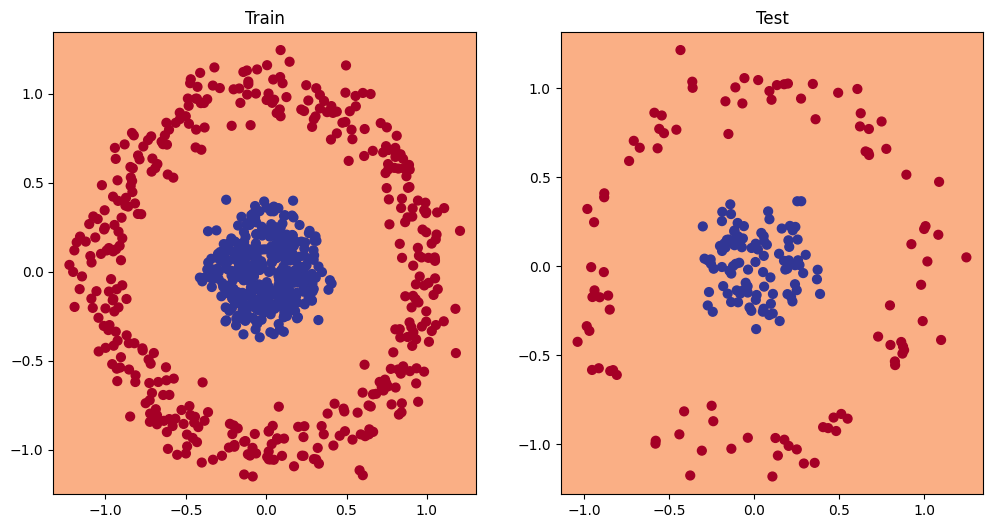

Epoch : 100 Loss : 0.683814525604248 Accuracy : 50.125
Epoch : 200 Loss : 0.6772627234458923 Accuracy : 41.875
Epoch : 300 Loss : 0.6718658208847046 Accuracy : 42.5
Epoch : 400 Loss : 0.6666216850280762 Accuracy : 58.12500000000001
Epoch : 500 Loss : 0.6612157225608826 Accuracy : 61.625
Epoch : 600 Loss : 0.6556244492530823 Accuracy : 63.74999999999999
Epoch : 700 Loss : 0.6499815583229065 Accuracy : 65.375
Epoch : 800 Loss : 0.6442590355873108 Accuracy : 66.875
Epoch : 900 Loss : 0.6383345723152161 Accuracy : 67.625
Epoch : 1000 Loss : 0.6321125626564026 Accuracy : 68.75
Epoch : 1000 Loss : 0.6321125626564026 Accuracy : 68.75


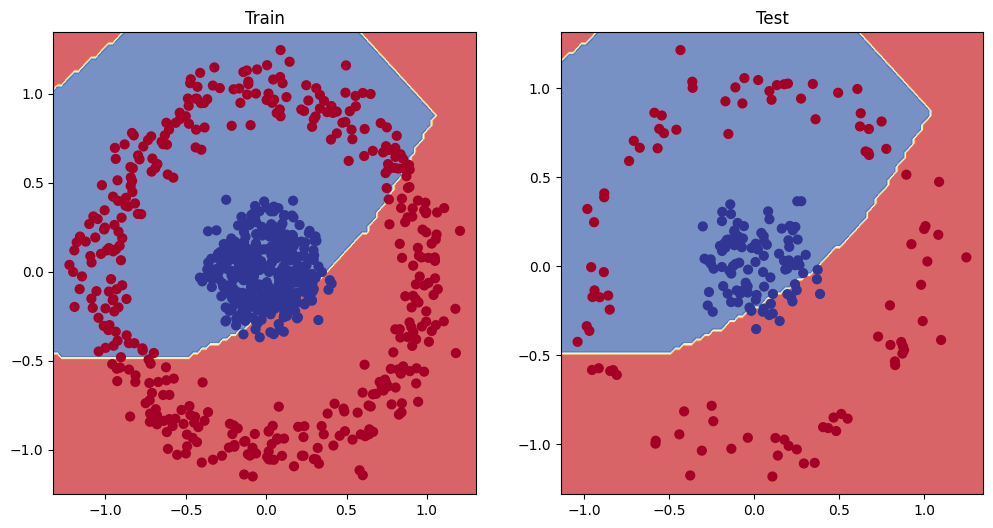

Epoch : 1100 Loss : 0.6254863142967224 Accuracy : 70.25
Epoch : 1200 Loss : 0.6183452010154724 Accuracy : 70.875
Epoch : 1300 Loss : 0.6105399131774902 Accuracy : 71.625
Epoch : 1400 Loss : 0.6020121574401855 Accuracy : 73.625
Epoch : 1500 Loss : 0.5927213430404663 Accuracy : 76.25
Epoch : 1600 Loss : 0.5826876163482666 Accuracy : 80.625
Epoch : 1700 Loss : 0.5720173716545105 Accuracy : 84.0
Epoch : 1800 Loss : 0.5605774521827698 Accuracy : 87.375
Epoch : 1900 Loss : 0.5482847690582275 Accuracy : 90.0
Epoch : 2000 Loss : 0.5351207256317139 Accuracy : 92.0
Epoch : 2000 Loss : 0.5351207256317139 Accuracy : 92.0


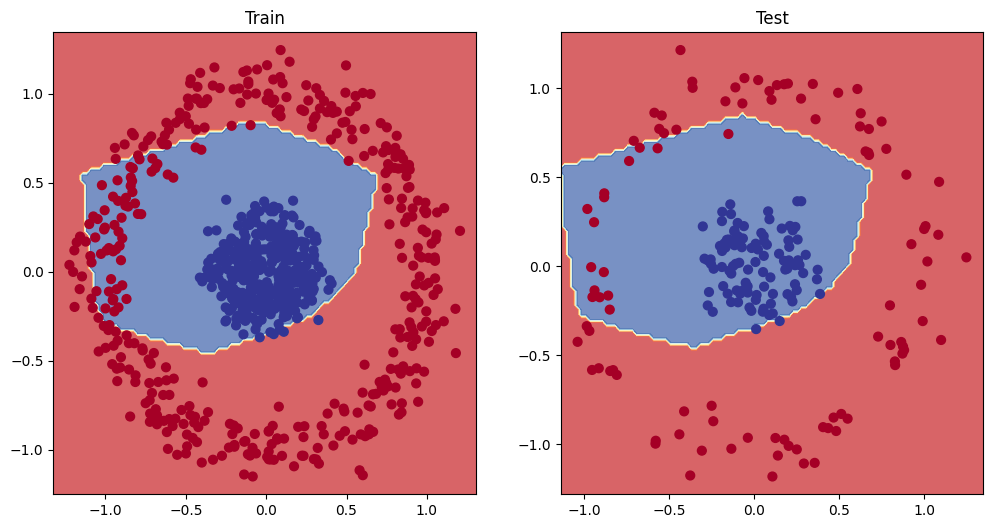

Epoch : 2100 Loss : 0.5210568904876709 Accuracy : 93.375
Epoch : 2200 Loss : 0.5061095952987671 Accuracy : 95.375
Epoch : 2300 Loss : 0.490453839302063 Accuracy : 97.0
Epoch : 2400 Loss : 0.47430622577667236 Accuracy : 98.625
Epoch : 2500 Loss : 0.4579680263996124 Accuracy : 99.0
Epoch : 2600 Loss : 0.4415997266769409 Accuracy : 99.625
Epoch : 2700 Loss : 0.4251587390899658 Accuracy : 99.75
Epoch : 2800 Loss : 0.40865498781204224 Accuracy : 99.875
Epoch : 2900 Loss : 0.3923308551311493 Accuracy : 100.0
Epoch : 3000 Loss : 0.37619510293006897 Accuracy : 100.0
Epoch : 3000 Loss : 0.37619510293006897 Accuracy : 100.0


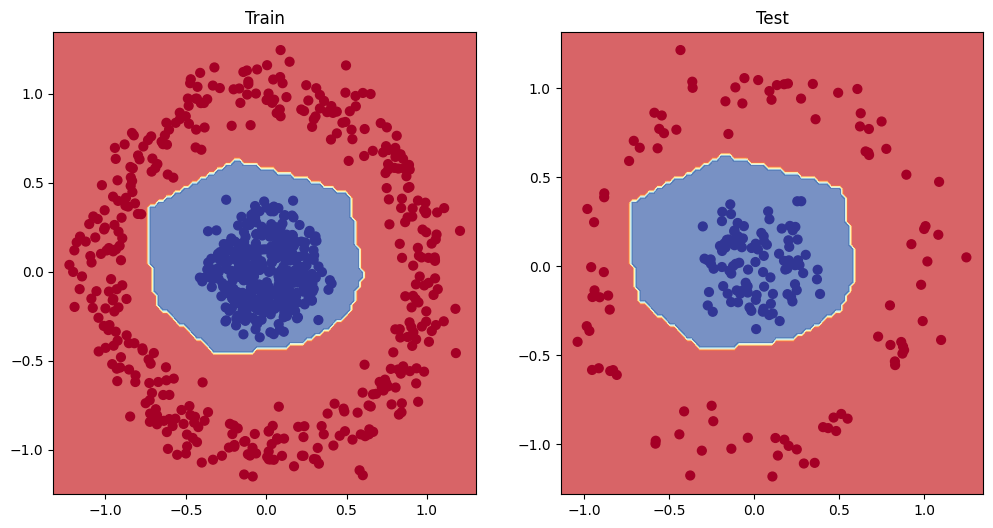

Epoch : 3100 Loss : 0.36028802394866943 Accuracy : 100.0
Epoch : 3200 Loss : 0.3446864187717438 Accuracy : 100.0
Epoch : 3300 Loss : 0.3294728994369507 Accuracy : 100.0
Epoch : 3400 Loss : 0.3147028982639313 Accuracy : 100.0
Epoch : 3500 Loss : 0.30044543743133545 Accuracy : 100.0
Epoch : 3600 Loss : 0.2867116928100586 Accuracy : 100.0
Epoch : 3700 Loss : 0.273524671792984 Accuracy : 100.0
Epoch : 3800 Loss : 0.26090383529663086 Accuracy : 100.0
Epoch : 3900 Loss : 0.24884796142578125 Accuracy : 100.0
Epoch : 4000 Loss : 0.23734977841377258 Accuracy : 100.0
Epoch : 4000 Loss : 0.23734977841377258 Accuracy : 100.0


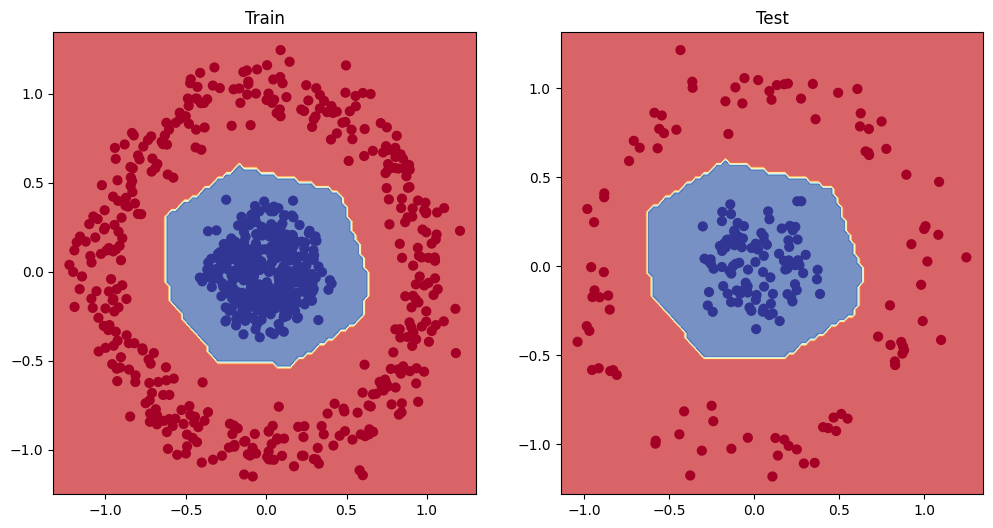

Epoch : 4100 Loss : 0.22642448544502258 Accuracy : 100.0
Epoch : 4200 Loss : 0.2160666137933731 Accuracy : 100.0
Epoch : 4300 Loss : 0.20625504851341248 Accuracy : 100.0
Epoch : 4400 Loss : 0.1969766467809677 Accuracy : 100.0
Epoch : 4500 Loss : 0.18821196258068085 Accuracy : 100.0
Epoch : 4600 Loss : 0.17994648218154907 Accuracy : 100.0
Epoch : 4700 Loss : 0.1721491813659668 Accuracy : 100.0
Epoch : 4800 Loss : 0.16479402780532837 Accuracy : 100.0
Epoch : 4900 Loss : 0.15785424411296844 Accuracy : 100.0
Epoch : 5000 Loss : 0.15131345391273499 Accuracy : 100.0
Epoch : 5000 Loss : 0.15131345391273499 Accuracy : 100.0


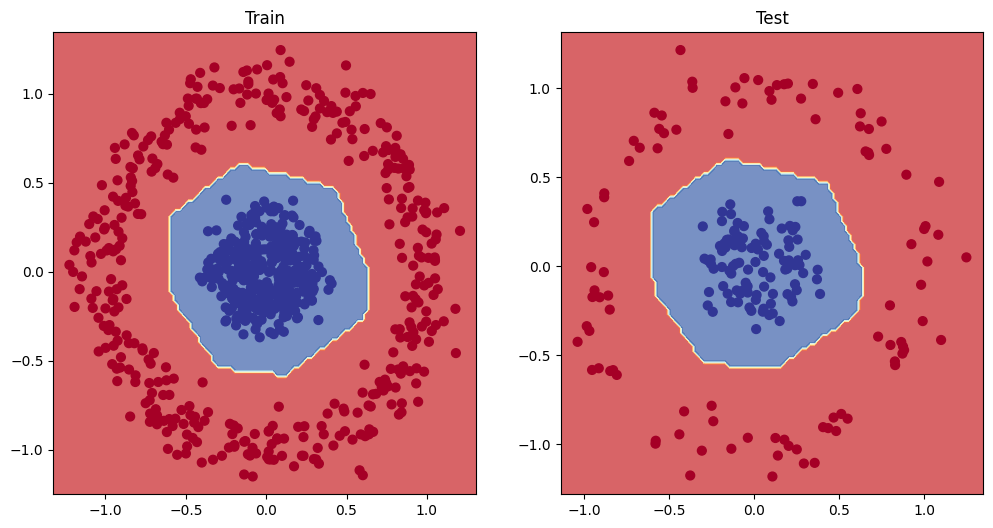

Epoch : 5100 Loss : 0.14514680206775665 Accuracy : 100.0
Epoch : 5200 Loss : 0.13933292031288147 Accuracy : 100.0
Epoch : 5300 Loss : 0.1338510364294052 Accuracy : 100.0
Epoch : 5400 Loss : 0.12868084013462067 Accuracy : 100.0
Epoch : 5500 Loss : 0.12380262464284897 Accuracy : 100.0
Epoch : 5600 Loss : 0.11919800937175751 Accuracy : 100.0
Epoch : 5700 Loss : 0.1148483008146286 Accuracy : 100.0
Epoch : 5800 Loss : 0.11073701828718185 Accuracy : 100.0
Epoch : 5900 Loss : 0.10685061663389206 Accuracy : 100.0
Epoch : 6000 Loss : 0.10317298769950867 Accuracy : 100.0
Epoch : 6000 Loss : 0.10317298769950867 Accuracy : 100.0


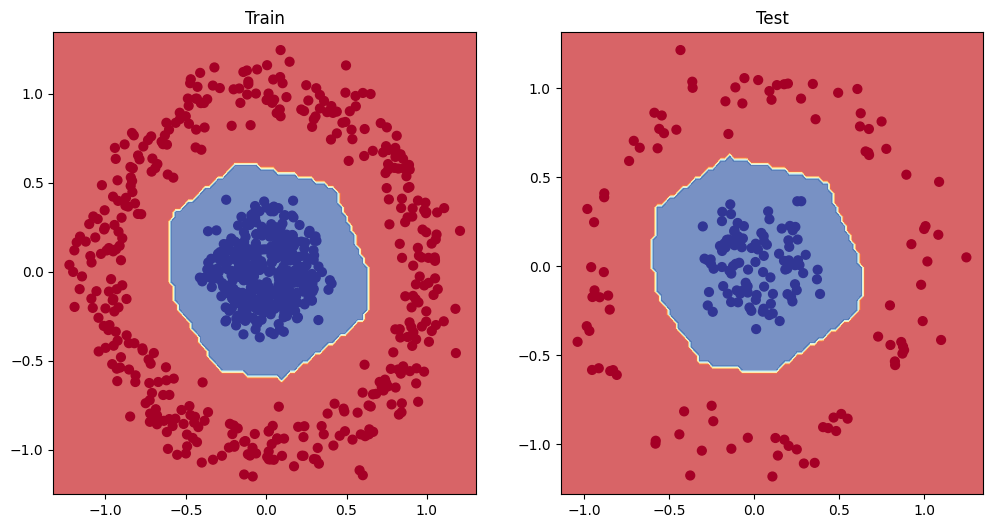

Epoch : 6100 Loss : 0.09969045966863632 Accuracy : 100.0
Epoch : 6200 Loss : 0.09639028459787369 Accuracy : 100.0
Epoch : 6300 Loss : 0.09326018393039703 Accuracy : 100.0
Epoch : 6400 Loss : 0.09028958529233932 Accuracy : 100.0
Epoch : 6500 Loss : 0.08746857941150665 Accuracy : 100.0
Epoch : 6600 Loss : 0.08478765189647675 Accuracy : 100.0
Epoch : 6700 Loss : 0.08223798125982285 Accuracy : 100.0
Epoch : 6800 Loss : 0.07981175184249878 Accuracy : 100.0
Epoch : 6900 Loss : 0.07750114053487778 Accuracy : 100.0
Epoch : 7000 Loss : 0.07529884576797485 Accuracy : 100.0
Epoch : 7000 Loss : 0.07529884576797485 Accuracy : 100.0


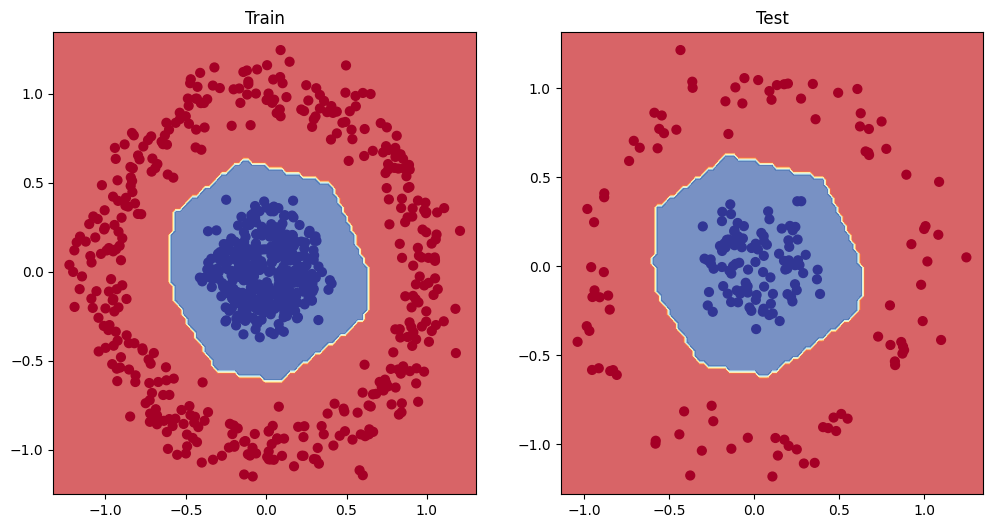

Epoch : 7100 Loss : 0.0731983631849289 Accuracy : 100.0
Epoch : 7200 Loss : 0.0711936354637146 Accuracy : 100.0
Epoch : 7300 Loss : 0.06927889585494995 Accuracy : 100.0
Epoch : 7400 Loss : 0.0674489438533783 Accuracy : 100.0


In [127]:
from helper_functions import plot_predictions, plot_decision_boundary
epochs = 7500

accuracy_path = []
loss_path = []

for epoch in range(epochs):
    #Forward pass
    logits = model_0(X_train.to(device)).squeeze()
    prob = torch.sigmoid(logits)
    pred = torch.round(prob)
    
    #Calculate the loss
    loss = loss_fn(logits.squeeze(), y_train.to(device))
    
    #Reset the gradients
    optimizer.zero_grad()
    
    #Backward pass
    loss.backward()

    #Step the optimizer
    optimizer.step()
    
    #Calculate the accuracy
    accuracy_path.append(accuracy_fn(pred, y_train.to(device)))
    loss_path.append(loss)
    
    #Calculate the accuracy
    if epoch%100 == 0:
        acc = accuracy_fn(pred, y_train.to(device))
        print(f'Epoch : {epoch} Loss : {loss} Accuracy : {acc}')
        
    if epoch%1000 == 0:
        print(f'Epoch : {epoch} Loss : {loss} Accuracy : {acc}')
        #Plot decision boundary
        plt.figure(figsize=(12,6))
        plt.subplot(1,2,1)
        plt.title("Train")
        plot_decision_boundary(model_0, X_train, y_train)
        plt.subplot(1,2,2)
        plt.title("Test")
        plot_decision_boundary(model_0, X_test, y_test)
        plt.show()

    

In [121]:
from helper_functions import plot_predictions, plot_decision_boundary

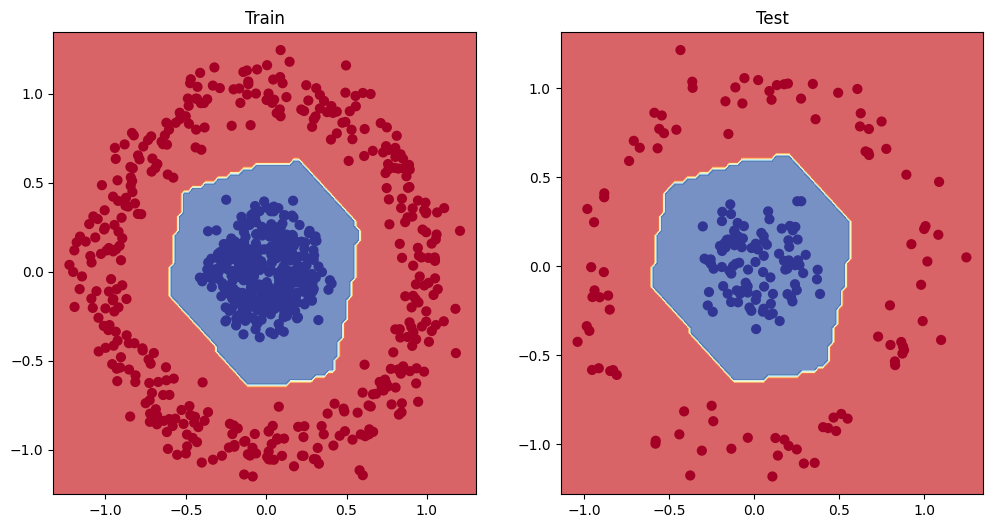

In [124]:
#Plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)